In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Importing data 

In [2]:
df = pd.read_csv('data/Classification_preprocessed_data_Python.csv', header = 0)

In [3]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,1,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,0,1,0,0


sold is the dependent variable

# Logistic regression

In [4]:
# we can implement logistic regression using both stats and sklearn library
# sklearn is preferred (it has lot of documentation)

In [5]:
# Let's get started by considering only one independent variable that is 'price' to predict 'sold' variable value

In [6]:
X = df[['price']]
print(X.head())
X.shape

   price
0   24.0
1   21.6
2   34.7
3   33.4
4   36.2


(506, 1)

In [7]:
y = df['Sold']
print(y.head())
y.shape

0    0
1    1
2    0
3    0
4    0
Name: Sold, dtype: int64


(506,)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
clf_lrs = LogisticRegression()

In [10]:
# training our model
clf_lrs.fit(X, y)

LogisticRegression()

In [11]:
# bheta0 and bheta1 values 
clf_lrs.intercept_, clf_lrs.coef_

(array([0.61477516]), array([[-0.03571865]]))

In [12]:
# now lets use stat model

In [13]:
import statsmodels.api as sn

In [14]:
X_cons = sn.add_constant(X)

In [15]:
# there is a constant added into our X
X_cons.head()

,const,price
0,1.0,24.0
1,1.0,21.6
2,1.0,34.7
3,1.0,33.4
4,1.0,36.2


In [16]:
import statsmodels.discrete.discrete_model as sm

In [17]:
# create the Logit model object
logit = sm.Logit(y, X_cons)

In [18]:
# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.676690
         Iterations 5


In [19]:
result.summary()
# we dont get this kind of summary in sklearn

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      504
Method:                           MLE   Df Model:                            1
Date:                Sat, 22 Jun 2024   Pseudo R-squ.:                 0.01788
Time:                        10:15:16   Log-Likelihood:                -342.41
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 0.0004142
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6149      0.248      2.484      0.013       0.130       1.100
price         -0.0357      0.010     -3.417      0.001      -0.056      -0.015
==============================================================================
"""

In [20]:
# MLE is the method 
# MLE = Maximum Likelihood Estimator

- Let us dive into summary
- std err
    - gives the deviation from true value
- z value
    - estimated value / std err
- P > |z|
    - We can get probability from z-static
    - probablity of bheta being 0 
    - usually the threshold is 5 (or) 1%, we can say that p value is less than choosen threshold then the correspoding variable will impact the dependent variable value.

In [21]:
# logstic with multiple independent variables

In [22]:
# all data columns except sold
X = df.loc[:, df.columns != 'Sold']

In [23]:
# dependent variable
y = df['Sold']

In [24]:
clf_lr = LogisticRegression(max_iter = 10000)
clf_lr.fit(X, y)

LogisticRegression(max_iter=10000)

In [25]:
# coeff, which can be subtituted in logistic regression function to make predictions
clf_lr.coef_

array([[-2.53870043e-01, -4.83625427e-04, -1.17408540e+00,
         9.64051292e-01, -4.55276896e-03,  2.68032406e-01,
        -2.09186670e-01,  1.77787045e-01, -7.57615911e-02,
        -5.57476442e-03, -4.86681911e-02, -3.18643564e-01,
        -1.14367024e-01, -6.56617115e-02, -2.47163335e-02,
         2.14916151e-01]])

In [26]:
clf_lr.intercept_

array([-1.79184468])

In [27]:
# Now let us do in statsmodels
X_cons = sn.add_constant(X)

In [28]:
logit = sm.Logit(y, X_cons).fit()

Optimization terminated successfully.
         Current function value: 0.556433
         Iterations 6


In [29]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      489
Method:                           MLE   Df Model:                           16
Date:                Sat, 22 Jun 2024   Pseudo R-squ.:                  0.1924
Time:                        10:15:16   Log-Likelihood:                -281.56
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 9.930e-21
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.1383      2.649     -0.807      0.420      -7.331       3.054
price                       -0.2741      0.033     -8.313      0.000      -0.339      -0.209
resid_area                   0.0192      0.027      0.720      0.471      -0.033       0.071
air_qual                    -7.4183      2.691     -2.757      0.006     -12.693      -2.144
room_num                     1.1067      0.277      4.001      0.000       0.565       1.649
age                         -0.0020      0.007     -0.302      0.762      -0.015       0.011
teachers                     0.3150      0.064      4.937      0.000       0.190       0.440
poor_prop                   -0.2077      0.034     -6.149      0.000      -0.274      -0.141
n_hos_beds                   0.1760      0.071      2.467      0.014       0.036       0.316
n_hot_rooms                 -0.0742      0.052     -1.439      0.150      -0.175       0.027
rainfall                    -0.0033      0.008     -0.394      0.693      -0.020       0.013
parks                       29.1089     24.177      1.204      0.229     -18.277      76.495
avg_dist                    -0.4017      0.098     -4.118      0.000      -0.593      -0.211
airport_YES                 -0.1524      0.211     -0.723      0.469      -0.565       0.261
waterbody_Lake              -0.1032      0.304     -0.340      0.734      -0.698       0.492
waterbody_Lake and River    -0.0626      0.328     -0.191      0.849      -0.705       0.580
waterbody_River              0.2394      0.256      0.937      0.349      -0.262       0.740
============================================================================================
"""

# Confusion matrix

In [30]:
# probablity of sold and not sold
clf_lr.predict_proba(X)

array([[0.13212955, 0.86787045],
       [0.37245577, 0.62754423],
       [0.96758955, 0.03241045],
       ...,
       [0.29830804, 0.70169196],
       [0.28267086, 0.71732914],
       [0.1864363 , 0.8135637 ]])

In [31]:
y_pred = clf_lr.predict(X) # this takes by default 0.5 as threshold (but 0.5 does not always apply, we may have to change threshold as many a times the cost of false negative and false positive is not same)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [32]:
# custom threshold
y_pred_03 = (clf_lr.predict_proba(X)[:, 1] >= 0.3)

# if the second is value is greater than 0.3, then we get 1

In [33]:
y_pred_03

array([ True,  True, False,  True, False, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False,

In [34]:
# let us find accuracy

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y, y_pred)

array([[195,  81],
       [ 79, 151]], dtype=int64)

In [37]:
# rows - actual outcomes
# cols - predicted outcoms
# row_0 - 0 class
# row_1 - 1 class
# col_0 - 0 class
# col_1 - 1 class

In [38]:
confusion_matrix(y, y_pred_03)

array([[122, 154],
       [ 17, 213]], dtype=int64)

In [39]:
# note the difference in confusion matrix
# The values are dense at true part of prediction because we decrease the threshold from 0.5 to 0.3

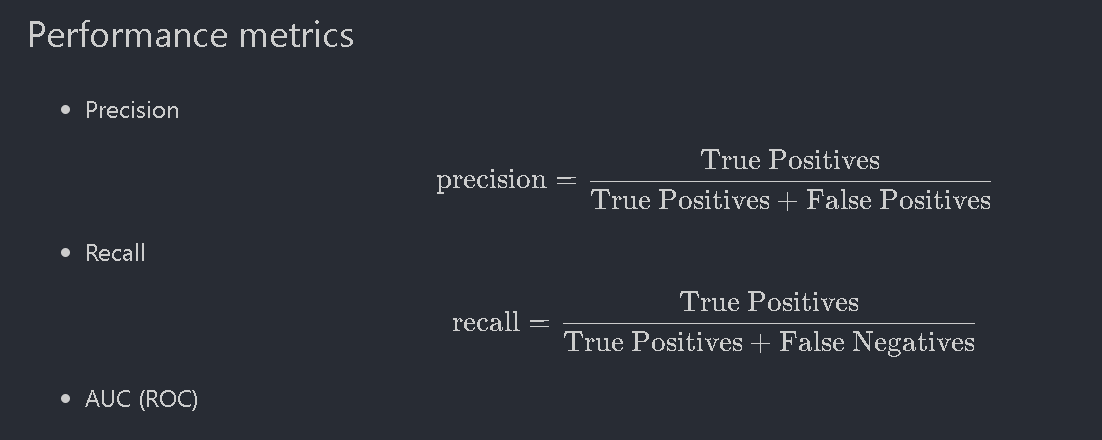

In [40]:
from sklearn.metrics import precision_score, recall_score

In [41]:
# (151) / (151 + 81)
precision_score(y, y_pred)

0.6508620689655172

In [42]:
# 151 / (151 + 79)
recall_score(y, y_pred)

0.6565217391304348

In [43]:
from sklearn.metrics import roc_auc_score
# see about auc score in notes

In [44]:
roc_auc_score(y, y_pred)

0.6815217391304348

# LDA : Linear Discriminant Analysis

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [46]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X, y)

LinearDiscriminantAnalysis()

In [47]:
y_pred_lda = clf_lda.predict(X)

In [48]:
y_pred_lda

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [49]:
confusion_matrix(y, y_pred_lda)

array([[192,  84],
       [ 79, 151]], dtype=int64)

In [50]:
import sklearn
# training error when using LDA
sklearn.metrics.accuracy_score(y, y_pred_lda)

0.6778656126482213

In [51]:
(192 + 151) / (192 + 151 + 84 + 79)

0.6778656126482213

# KNN classifier

### preprocessing

In [52]:
from sklearn import preprocessing

In [53]:
scaler = preprocessing.StandardScaler().fit(X)
X_s = scaler.transform(X)

In [54]:
X

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.17920,27,0.056006,2.4775,0,0,1,0
502,20.6,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.16480,20,0.059903,2.2875,1,0,1,0
503,23.9,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.19120,31,0.057572,2.1675,0,0,0,0
504,22.0,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.17600,47,0.060694,2.3900,1,0,0,0


In [55]:
X_s

array([[ 0.16037616, -1.2879095 , -0.14421743, ..., -0.48699468,
        -0.40400296,  1.32854331],
       [-0.10125846, -0.59338101, -0.74026221, ...,  2.05341054,
        -0.40400296, -0.7527041 ],
       [ 1.32683049, -0.59338101, -0.74026221, ..., -0.48699468,
        -0.40400296, -0.7527041 ],
       ...,
       [ 0.14947472,  0.11573841,  0.15812412, ..., -0.48699468,
        -0.40400296, -0.7527041 ],
       [-0.05765269,  0.11573841,  0.15812412, ..., -0.48699468,
        -0.40400296, -0.7527041 ],
       [-0.38469596,  0.11573841,  0.15812412, ..., -0.48699468,
        -0.40400296, -0.7527041 ]])

In [56]:
# When a variable is standardized
# then 
#   - its mean is made zero
#   - its standard deviation is 1

### KNN model

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
clf_knn_1 = KNeighborsClassifier(n_neighbors = 1)
clf_knn_1.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [60]:
confusion_matrix(y, clf_knn_1.predict(X))

array([[276,   0],
       [  0, 230]], dtype=int64)

In [61]:
accuracy_score(y, clf_knn_1.predict(X))
# Possibly clf_knn_1 is doing overfitting because
    # K = 1
    # training error is 100 precent

1.0

# Training and testing of all classifers

### Test-train split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:

# validation test-train split
# 20 percent for testing
# 80 percent for training

'''
Reproducibility: By setting the random_state parameter to a fixed value (like 0 in your example), 
you ensure that the function will produce the same split every time you run your code.
This is crucial for reproducibility, especially when you're developing or testing models, as it allows you to compare results consistently
'''


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 16), (102, 16), (404,), (102,))

### Logistic Regression (LR)

In [65]:
# Logistic regression (LR)
clf_LR = LogisticRegression(max_iter = 1000)
clf_LR.fit(X_train, y_train)

# making predictions on training set
y_train_pred = clf_LR.predict(X_train)

# Confusion matrix on training set of LR model
print("Confusion matrix on training set of LR model")
print(confusion_matrix(y_train, y_train_pred))

# training accuracy and training error
training_accuracy = accuracy_score(y_train, y_train_pred)
training_error = 1 - training_accuracy
print("Training accuracy = ", training_accuracy)
print("Training error = ", training_error)

print("-------------------------------------------------------------")

# making predictions on test set
y_test_pred = clf_LR.predict(X_test)

# Confusion matric on test set of LR model
print("Confusion matrix on test set of LR model")
print(confusion_matrix(y_test, y_test_pred))

# test accuracy and test error
test_accuracy = accuracy_score(y_test, y_test_pred) # (34 + 33)/(34 + 33 + 24 + 11)
test_error = 1 - test_accuracy
print("Test accuracy = ", test_accuracy)
print("Test error = ", test_error)

Confusion matrix on training set of LR model
[[148  70]
 [ 67 119]]
Training accuracy =  0.6608910891089109
Training error =  0.3391089108910891
-------------------------------------------------------------
Confusion matrix on test set of LR model
[[37 21]
 [12 32]]
Test accuracy =  0.6764705882352942
Test error =  0.32352941176470584


### Linear Discriminant Analysis (LDA)

In [66]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train, y_train)

# making predictions on training set
y_train_pred = clf_lda.predict(X_train)

# Confusion matrix on training set of LDA model
print("Confusion matrix on training set of LDA model")
print(confusion_matrix(y_train, y_train_pred))

# training accuracy and training error
training_accuracy = accuracy_score(y_train, y_train_pred)
training_error = 1 - training_accuracy
print("Training accuracy = ", training_accuracy)
print("Training error = ", training_error)

print("-------------------------------------------------------------")

# making predictions on test set
y_test_pred = clf_lda.predict(X_test)

# Confusion matric on test set of LDA model
print("Confusion matrix on test set of LDA model")
print(confusion_matrix(y_test, y_test_pred))

# test accuracy and test error
test_accuracy = accuracy_score(y_test, y_test_pred) # (34 + 33)/(34 + 33 + 24 + 11)
test_error = 1 - test_accuracy
print("Test accuracy = ", test_accuracy)
print("Test error = ", test_error)

Confusion matrix on training set of LDA model
[[158  60]
 [ 66 120]]
Training accuracy =  0.6881188118811881
Training error =  0.31188118811881194
-------------------------------------------------------------
Confusion matrix on test set of LDA model
[[34 24]
 [11 33]]
Test accuracy =  0.6568627450980392
Test error =  0.3431372549019608


### KNN

In [67]:
# standardizing data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)

scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s = scaler.transform(X_test)

In [68]:
# KNN with different hyper parameter values
k_values = [i for i in range(1, 100 + 1)]
training_error = []
test_error = []
for k in k_values:
    clf_knn_k = KNeighborsClassifier(n_neighbors = k).fit(X_train_s, y_train)
    training_error.append(1-accuracy_score(clf_knn_k.predict(X_train_s), y_train))
    test_error.append(1-accuracy_score(clf_knn_k.predict(X_test_s), y_test))

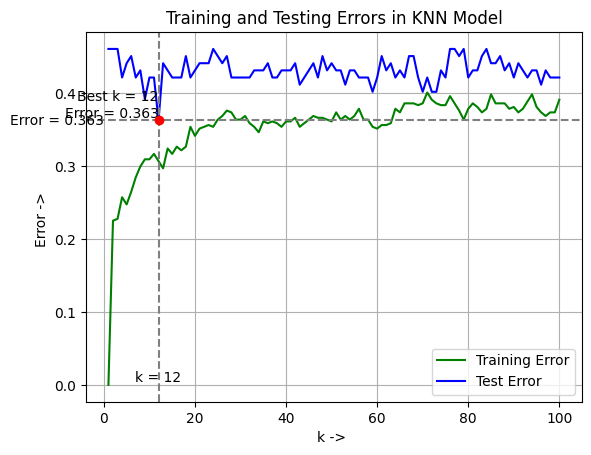

In [69]:
import matplotlib.pyplot as plt

# Assuming k_values, training_error, and test_error are already defined

# Find the index of the minimum test error
min_test_error_index = test_error.index(min(test_error))
best_k_value = k_values[min_test_error_index]
best_test_error = test_error[min_test_error_index]

# Plot the training and test errors
plt.plot(k_values, training_error, label="Training Error", color = "green")
plt.plot(k_values, test_error, label="Test Error", color = "blue")

# Highlight the point with the lowest test error
plt.scatter(best_k_value, best_test_error, color='red', zorder=5)
plt.text(best_k_value, best_test_error, f'Best k = {best_k_value}\nError = {best_test_error:.3f}', 
         verticalalignment='bottom', horizontalalignment='right')

# Draw vertical and horizontal lines
plt.axhline(y=best_test_error, color='grey', linestyle='--')
plt.axvline(x=best_k_value, color='grey', linestyle='--')

# Annotate the intersection points on the axes
plt.text(best_k_value, 0, f'k = {best_k_value}', verticalalignment='bottom', horizontalalignment='center')
plt.text(0, best_test_error, f'Error = {best_test_error:.3f}', verticalalignment='center', horizontalalignment='right')

# Add labels and title
plt.title("Training and Testing Errors in KNN Model")
plt.xlabel("k -> ")
plt.ylabel("Error -> ")
plt.legend()
plt.grid()

# Show the plot
plt.show()


In [70]:
from tabulate import tabulate
data = list(zip(k_values[:10], training_error[:10], test_error[:10]))
print(tabulate(data, headers = ["k", "training error", "testing error"], tablefmt = "grid"))

+-----+------------------+-----------------+
|   k |   training error |   testing error |
+=====+==================+=================+
|   1 |         0        |        0.460784 |
+-----+------------------+-----------------+
|   2 |         0.225248 |        0.460784 |
+-----+------------------+-----------------+
|   3 |         0.227723 |        0.460784 |
+-----+------------------+-----------------+
|   4 |         0.257426 |        0.421569 |
+-----+------------------+-----------------+
|   5 |         0.247525 |        0.441176 |
+-----+------------------+-----------------+
|   6 |         0.264851 |        0.45098  |
+-----+------------------+-----------------+
|   7 |         0.284653 |        0.421569 |
+-----+------------------+-----------------+
|   8 |         0.299505 |        0.431373 |
+-----+------------------+-----------------+
|   9 |         0.309406 |        0.392157 |
+-----+------------------+-----------------+
|  10 |         0.309406 |        0.421569 |
+-----+---

In [71]:
# let us see how can we take optimal k value

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
params = {'n_neighbors' : [i for i in range(1, 20 + 1)]}
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)
grid_search_cv.fit(X_train_s, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]})

In [74]:
# find out the best k-value
grid_search_cv.best_params_

{'n_neighbors': 9}

In [75]:
# but on what basis the best is selected??
# because we are not passing any test set right ??
# Ans:
#       The selection of the "best" parameters is based on cross-validation within the training set, not on a separate test set. 

In [76]:
best_knn = grid_search_cv.best_estimator_ # getting the best KNN model out of all KNN models specified as parameter
y_test_pred = best_knn.predict(X_test_s)

In [77]:
confusion_matrix(y_test, y_test_pred)

array([[36, 22],
       [18, 26]], dtype=int64)

In [78]:
accuracy_score(y_test, y_test_pred)

0.6078431372549019